In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive

Mounted at /content/drive
/content/drive


In [ ]:
df = pd.read_csv('MyDrive/crisis_Tweets.csv')
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,text,target
0,0,0.0,0.0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,1.0,1.0,Telangana: Section 144 has been imposed in Bha...,1
2,2,2.0,2.0,Arsonist sets cars ablaze at dealership https:...,1
3,3,3.0,3.0,Arsonist sets cars ablaze at dealership https:...,1
4,4,4.0,4.0,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
df.shape

(36845, 5)

In [ ]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'text', 'target'], dtype='object')

Start filtering and modifying the dataset


In [ ]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Unnamed: 0.2'],axis=1)
df.shape

(36845, 2)

In [ ]:
df.head()

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36845 entries, 0 to 36844
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    36845 non-null  object
 1   target  36845 non-null  object
dtypes: object(2)
memory usage: 575.8+ KB


In [ ]:
special_rows = df[(df['target'] != "0") & (df['target'] != "1")]
print(special_rows)
df['target'][11391] = 1

                                text                      target
11391  strong quake hits north italy   at least three dead <URL>


In [ ]:
df['target'] = pd.to_numeric(df['target'])

In [ ]:
df['target'].value_counts()

1    26174
0    10671
Name: target, dtype: int64

In [ ]:
_indices = df[df['target'] == 1].index
len(_indices)

26174

In [ ]:
#@title Dealing with imbalanced dataset  
# df_0_class = df[df['target']==0]
# df_1_class = df[df['target']==1]
# df_0_class_undersampled = df_0_class.sample(df_1_class.shape[0])
# df = pd.concat([df_0_class_undersampled, df_1_class], axis=0)

In [ ]:
# Splitting the majority class (1) into two random batches
b_1, b_2 = train_test_split(df[df['target']==1], test_size=0.5, random_state=200)

# Combining the minority class (0) with both batches
b_1 = pd.concat([df[df['target']==0], b_1])
b_2 = pd.concat([df[df['target']==0], b_2])
print("The size of batch 1 is ",b_1.shape)
print("The size of batch 2 is ",b_2.shape)

The size of batch 1 is  (23758, 2)
The size of batch 2 is  (23758, 2)


In [ ]:
b_2['target'].value_counts()

1    13087
0    10671
Name: target, dtype: int64

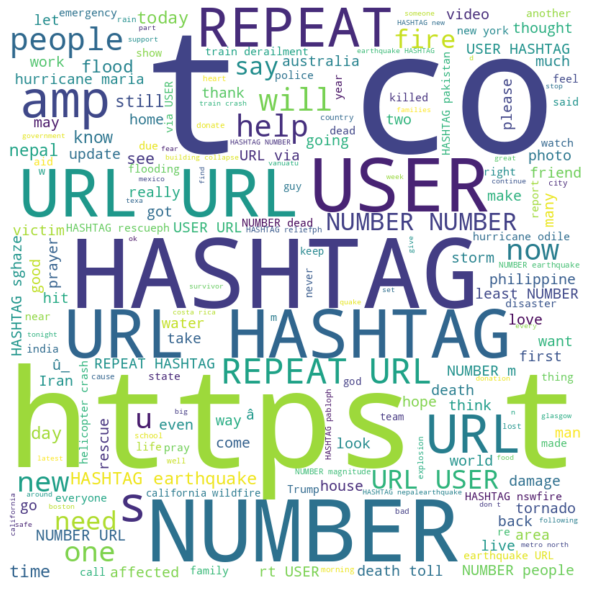

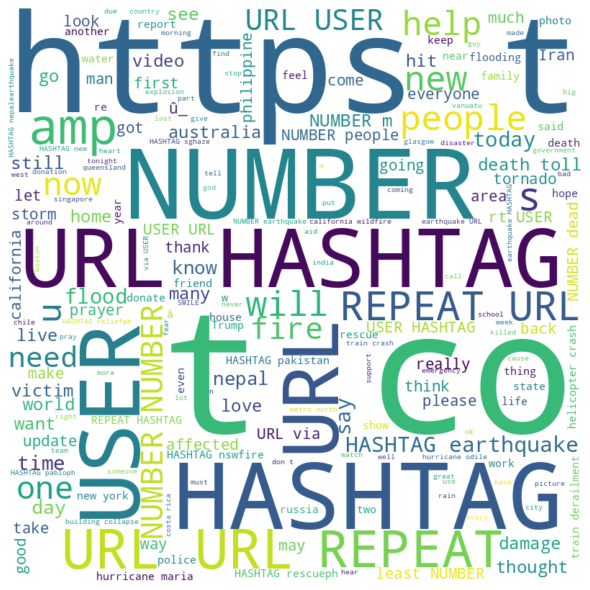

In [ ]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(b_1['text']))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(b_2['text']))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

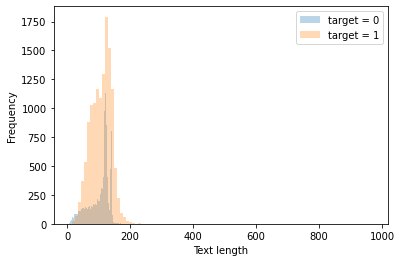

In [ ]:
# Plot histogram of text lengths for target = 0
plt.hist(b_1[b_1['target'] == 0]['text'].str.len(), bins=100, alpha=0.3, label='target = 0')

# Plot histogram of text lengths for target = 1
plt.hist(b_1[b_1['target'] == 1]['text'].str.len(), bins=100, alpha=0.3, label='target = 1')

plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

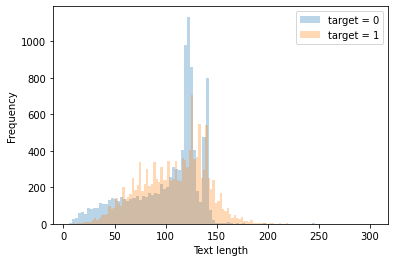

In [ ]:
plt.hist(b_2[b_2['target'] == 0]['text'].str.len(), bins=100, alpha=0.3, label='target = 0')

# Plot histogram of text lengths for target = 1
plt.hist(b_2[b_2['target'] == 1]['text'].str.len(), bins=100, alpha=0.3, label='target = 1')

plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

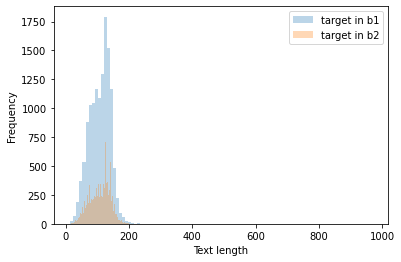

In [ ]:
plt.hist(b_1[b_1['target'] == 1]['text'].str.len(), bins=100, alpha=0.3, label='target in b1')

# Plot histogram of text lengths for target = 1
plt.hist(b_2[b_2['target'] == 1]['text'].str.len(), bins=100, alpha=0.3, label='target in b2')

plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

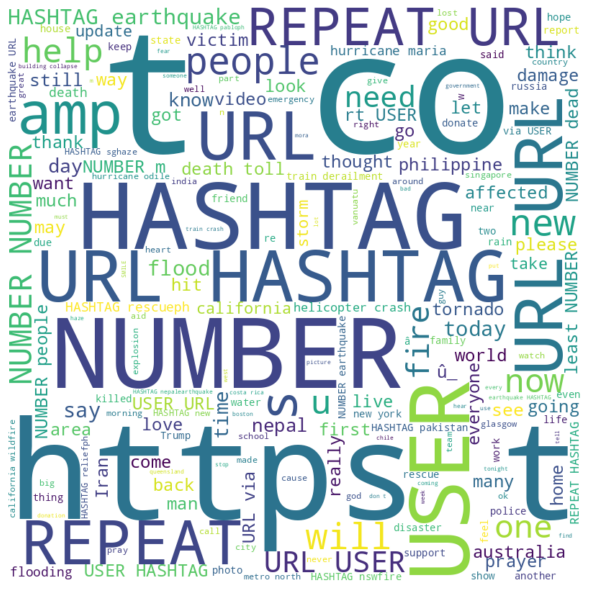

In [ ]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(b_2['text']))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Selecting batch 2 

In [ ]:
b_2['target'].value_counts()

1    13087
0    10671
Name: target, dtype: int64

In [ ]:
import string
import re
def has_high_noise(text):
    non_alphabetic_chars = set(text) - set(string.ascii_letters)
    noise_percentage = len(non_alphabetic_chars) / len(text)
    return noise_percentage > 0.5

def has_high_noise1(text):
    #  for high noise characters
    pattern = r'[^\w\s#]'
    num_matches = len(re.findall(pattern, text))
    if num_matches > 5:
        return True
    else:
        return False

mask = b_2['text'].apply(has_high_noise)

# use the mask to drop the rows with high noise from the dataframe
b_2 = b_2[~mask]

In [ ]:
b_2['target'].value_counts()

1    13087
0    10667
Name: target, dtype: int64

In [ ]:
mask = b_2['text'].apply(has_high_noise1)

# use the mask to drop the rows with high noise from the dataframe
b_22 = b_2[~mask]

In [ ]:
mask = b_1['text'].apply(has_high_noise1)

# use the mask to drop the rows with high noise from the dataframe
b_11 = b_1[~mask]

In [ ]:
b_1['target'].value_counts()

1    13087
0    10671
Name: target, dtype: int64

In [ ]:
b_2['target'].value_counts()

1    13087
0    10667
Name: target, dtype: int64

# ***Cleaning tweets***

In [ ]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 KB 5.3 MB/s eta 0:00:00


In [ ]:
import demoji

In [ ]:
def remove_emojis(text):
    return demoji.replace(text, '')

In [ ]:
# strr="Python is 👍"
# strr= remove_emojis(str)
# strr

In [ ]:
!pip install tweet-preprocessor


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import preprocessor as p

In [ ]:
b=b_1
bb=b_2

In [ ]:
b_1.shape

(23758, 2)

In [ ]:
def clean_tweets(df):
  df.loc[:, "text"] = df["text"].str.replace(r"@\S+","", regex=True)
  df.loc[:, "text"] = df["text"].str.replace(r"http\S+", "", regex=True)
  df.loc[:, "text"] = df["text"].str.replace(r"RT", "")
  df.loc[:, "text"] = df["text"].str.replace(r"<URL>", "")
  df.loc[:, "text"] = df["text"].str.replace(r"<USER>", "")
  df.loc[:, "text"] = df["text"].str.replace(r"<HASHTAG> ", "#")
  df.loc[:, "text"] = df["text"].str.replace(r"<REPEAT>", "")
  df.loc[:, "text"] = df["text"].str.replace(r"<SMILE>", "")
  df.loc[:, "text"] = df["text"].str.replace(r"<NUMBER>", "")
  df.loc[:, "text"] = df["text"].str.replace(r"&amp;", "&")



printable = set(string.printable)
def clean_text(text):
  text= re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
  text = re.sub(r'#', '',  str(text)) # remove the '#' symbol
  text = re.sub(r'RT[\s]+', '',  str(text)) # remove RT
  text = re.sub(r'https?\/\/S+', '', str(text)) # remove the hyperlink
  text = re.sub(r'http\S+', '', str(text)) # remove the hyperlink
  text = re.sub(r'www\S+', '', str(text)) # remove the www
  text = re.sub(r'twitter+', '', str(text)) # remove the twitter
  text = re.sub(r'pic+', '', str(text)) # remove the pic
  text = re.sub(r'com', '', str(text)) # remove the com
  text = ''.join(filter(lambda x: x in printable, text))
  text = p.clean(text)
  return text


In [ ]:
clean_tweets(b)
clean_tweets(bb)

In [ ]:
b

,text,target
4,"""Lord Jesus, your love brings freedom and pard...",0
5,"If this child was Chinese, this tweet would ha...",0
8,"National Security Minister, Kan Dapaah's side ...",0
9,This creature who’s soul is no longer clarent ...,0
11,Social media went bananas after Chuba Hubbard ...,0
...,...,...
18292,same area as monday's floods rt flash flood w...,1
23263,usaf c 0044 rc departed march arb at to sa...,1
4454,Your Immigration Policies Has Caused The Death...,1
22161,of home damage costs caused by harvey are not...,1


In [ ]:
tyt=clean_text(b.loc[9,"text"])
b.loc[9,"text"]

'This creature who’s soul is no longer clarent but blue ablaze This thing Carrying memories Memories of… '

In [ ]:
b.loc[9,"text"] = tyt
b.loc[9,'target']

0

In [ ]:
for index, row in bb.iterrows():
  t = clean_text(row['text'])
  t = remove_emojis(t)
  bb.loc[index, 'text'] = t

In [ ]:
for index, row in b.iterrows():
  t = clean_text(row['text'])
  t = remove_emojis(t)
  b.loc[index, 'text'] = t


In [ ]:
bb

,text,target
4,"""Lord Jesus, your love brings freedom and pard...",0
5,"If this child was Chinese, this tweet would ha...",0
8,"National Security Minister, Kan Dapaah's side ...",0
9,This creature whos soul is no longer clarent b...,0
11,Social media went bananas after Chuba Hubbard ...,0
...,...,...
28241,russia gets hit with a meteor like its nothing,1
28674,"at the rate the psi is increasing, if the mosq...",1
23692,hurricane odile situation report : hmrd greatw...,1
33621,"hoppercam: crews waterbombing minmi blaze, wes...",1


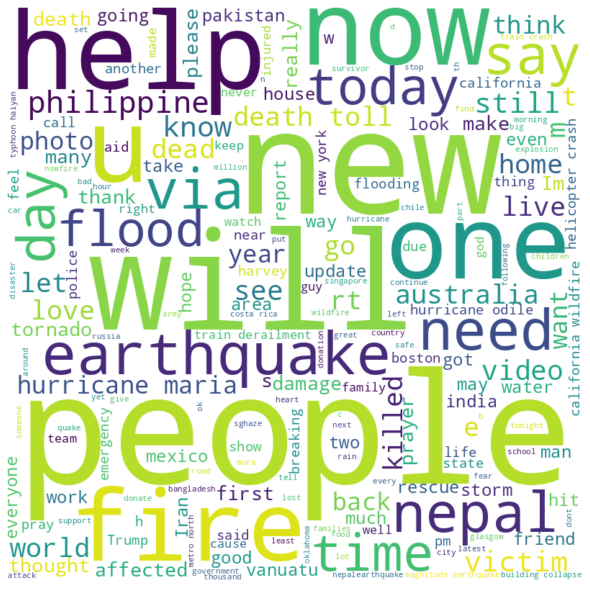

In [ ]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(b_1['text']))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
b_1['target'].value_counts()

1    13087
0    10671
Name: target, dtype: int64

**Dealing with oversampled positive tweets**

In [ ]:
b_0_class = b[b['target']==0]
b_1_class = b[b['target']==1]
b_1_class_undersampled = b_1_class.sample(b_0_class.shape[0])
b = pd.concat([b_1_class_undersampled, b_0_class], axis=0)

In [ ]:
b['target'].value_counts()

1    10671
0    10671
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(b['text'],b['target'],test_size=0.2,stratify=b['target'])

In [ ]:
X_train.shape


(17073,)

**BERT and it's techniques**

In [ ]:
!pip install tensorflow-text
!pip install tensorflow

In [ ]:
!pip install tensorflow

In [ ]:
!pip install tensorflow_hub

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text-layer')
preprocessed_text = preprocess(text_input)
outputs = encoder(preprocessed_text)
d_layer = tf.keras.layers.Dropout(0.1, name="dropout-layer")(outputs['pooled_output'])
d_layer = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(d_layer)
model = tf.keras.Model(inputs=[text_input], outputs = [d_layer])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text-layer (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text-layer[0][0]']             
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [ ]:
# earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
#                                                       patience = 3,
#                                                       restore_best_weights = True)
# validation_data = (X_test, y_test),callbacks = [earlystop_callback]

In [ ]:
m= [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=m)

In [ ]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
534/534 [==============================] - 181s 335ms/step - loss: 0.5512 - accuracy: 0.7173 - precision: 0.7215 - recall: 0.7080
Epoch 2/20
534/534 [==============================] - 181s 340ms/step - loss: 0.4740 - accuracy: 0.7797 - precision: 0.7829 - recall: 0.7742
Epoch 3/20
534/534 [==============================] - 182s 341ms/step - loss: 0.4478 - accuracy: 0.7954 - precision: 0.7987 - recall: 0.7899
Epoch 4/20
534/534 [==============================] - 181s 339ms/step - loss: 0.4349 - accuracy: 0.8013 - precision: 0.8053 - recall: 0.7947
Epoch 5/20
534/534 [==============================] - 182s 342ms/step - loss: 0.4278 - accuracy: 0.8059 - precision: 0.8084 - recall: 0.8019
Epoch 6/20
534/534 [==============================] - 183s 342ms/step - loss: 0.4170 - accuracy: 0.8128 - precision: 0.8171 - recall: 0.8060
Epoch 7/20
534/534 [==============================] - 183s 342ms/step - loss: 0.4144 - accuracy: 0.8122 - precision: 0.8163 - recall: 0.8058
Epoch 8/20
53

In [ ]:
model.evaluate(X_test, y_test)

134/134 [==============================] - 44s 324ms/step - loss: 0.3702 - accuracy: 0.8445 - precision: 0.8952 - recall: 0.7802


[0.37016960978507996,
 0.8444600701332092,
 0.8951612710952759,
 0.7802249193191528]

In [ ]:
import json

In [ ]:
model_json = model.to_json()
with open("MyDrive/model.json", "w") as json_file:
  json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("MyDrive/model.h5")
print("Saved model to drive")

Saved model to drive


In [ ]:
#@title Testing the saved model 
from tensorflow.keras.models import model_from_json
from tensorflow_hub import KerasLayer
import json

In [ ]:
# Load the model
with open('MyDrive/model.json', 'r') as json_file:
    model_json = json_file.read()
# model = tf.keras.models.model_from_json(model_json)
custom_objects = {"KerasLayer": KerasLayer}
model = tf.keras.models.model_from_json(model_json, custom_objects=custom_objects)
# Load the weights
model.load_weights('MyDrive/model.h5')
print("Loaded model from disk")

Loaded model from disk


In [ ]:
X_test

14944    kathmandu patan district. old royal square dev...
30489    just developed my tures of joplin for my poste...
25118    i'm trying to warn people pam for real. mmamayhem
2486     Homer is driving drunk and has collided with a...
18157    modiministry flood, landslides in arunachal pr...
                               ...                        
87                                               (Yakov_Z)
3030     It es as no surprise that Bernie Sanders would...
10989    imagine if......a whirlwind Twitter tour, self...
16838    usgs reports a earthquake m n of pahrump, neva...
2053     The only one who can sense in a moment if his ...
Name: text, Length: 4269, dtype: object

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()


134/134 [==============================] - 43s 321ms/step


In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

In [ ]:
plt.plot(precision, recall)
plt.xlabel('precision ')
plt.ylabel('recall')
plt.title('precision-recall curve')
plt.show()

In [ ]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
tweets = X_test.tolist()

In [ ]:
y_pred =y_predicted.tolist()
# y_pred.count(1)
len(y_pred)==len(X_test)

True

In [ ]:
for i in range(0,len(y_pred)):
  if y_pred[i] == 1:
    print (" The disaster tweet is : "+tweets[i])
    # try :
    #   print (" The disaster tweet is : "+X_test[ind])
    # except:
    #   print(" ingorned ")

In [ ]:
matrix = confusion_matrix(y_test, y_predicted)
matrix

array([[   0, 2134],
       [   0, 2618]])

In [ ]:

# evaluate loaded model on test data
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 55.09%
